In [1]:
#%run equivalent_latitude_dask.ipynb

In [2]:
#%run extended_profile.ipynb

In [3]:
#%run analysis.ipynb

In [4]:
import xarray as xr
import glob
import warnings
import seaborn as sns
import dask.dataframe as dd
import numpy as np
import pandas as pd
from scipy import stats
from facets import facets
from mls import *
from plots import *
from utility import *
import matplotlib.pyplot as plt
from matplotlib import ticker 
%matplotlib inline
warnings.filterwarnings('ignore')
#dir(dd)

/home/pankaj/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/pankaj/.local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/pankaj/.local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/pankaj/.local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/pankaj/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: RuntimeWarni

In [5]:
#select month
mon_no=10
months=['January','February','March','April','May','June','July','August','September','October','November','December']
mon_name=months[mon_no-1]
print mon_name

October


In [6]:
#Roy M. Harrison#plt.subplot_tool()
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 
mpl.rcParams['figure.titlesize'] = 24
mpl.rcParams['font.size'] = 20
#mpl.rc('lines', linewidth=2)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 3

#mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelpad'] = 11
#mpl.rcParams['axes.labelweight'] = 'bold'
#mpl.rc('font', weight='bold')
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams["xtick.top"]="on"
mpl.rcParams["xtick.bottom"]="on"
mpl.rcParams["xtick.major.size"]=10
mpl.rcParams["ytick.major.size"]=10
mpl.rcParams["ytick.minor.size"]=6
mpl.rcParams["xtick.minor.size"]=6
mpl.rcParams["xtick.labelsize"]=22
mpl.rcParams["ytick.labelsize"]=22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in' 

mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.labelspacing'] = 0.1

#mpl.rcParams.keys()
#mpl.matplotlib_fname()

In [7]:
#constatnts
du=2.69E16*1E-12*1E-5
yrs=np.arange(1979,2018)
#print(yrs)
pot=np.arange(325,1000,25)
tsize=10

In [8]:
# file path
merged='/home/pankaj/phd/saturation/data/comb/'
floc='/home/pankaj/phd/saturation/plot/'+mon_name+'/'
tco='/home/pankaj/phd/saturation/data/omi/'
par='/home/pankaj/phd/saturation/data/partial/'
eps=floc+'eps/'
pdf=floc+'pdf/'
png=floc+'png/'
[make_dir(folder) for folder in [merged,floc,tco,par,eps,pdf,png]]

[None, None, None, None, None, None, None]

In [9]:
# Station details
stations=['davs','spol', 'neum', 'myth', 'syow',  'marb','mcmu','mirn']
names=['Davis', 'South Pole', 'Neumayer', 'Maitri', 'Syowa',  'Marambio','McMurdo','Mirny']
clrs=['violet','magenta','orange','olive','red','blue','green','turquoise']
cte_lat=[-69,-90, -71, -70, -69,  -64, -79, 66]
cte_lon=[78, 335,  352,  11,  40,   303, 167, 93]
order=[2,4,1,5,6,3,0,7]
stations,names,clrs,cte_lat,cte_lon=[[stations[i] for i in order],[names[i] for i in order],
 [clrs[i] for i in order],[cte_lat[i] for i in order],[cte_lon[i] for i in order]]
print names

['Neumayer', 'Syowa', 'South Pole', 'Marambio', 'McMurdo', 'Maitri', 'Davis', 'Mirny']


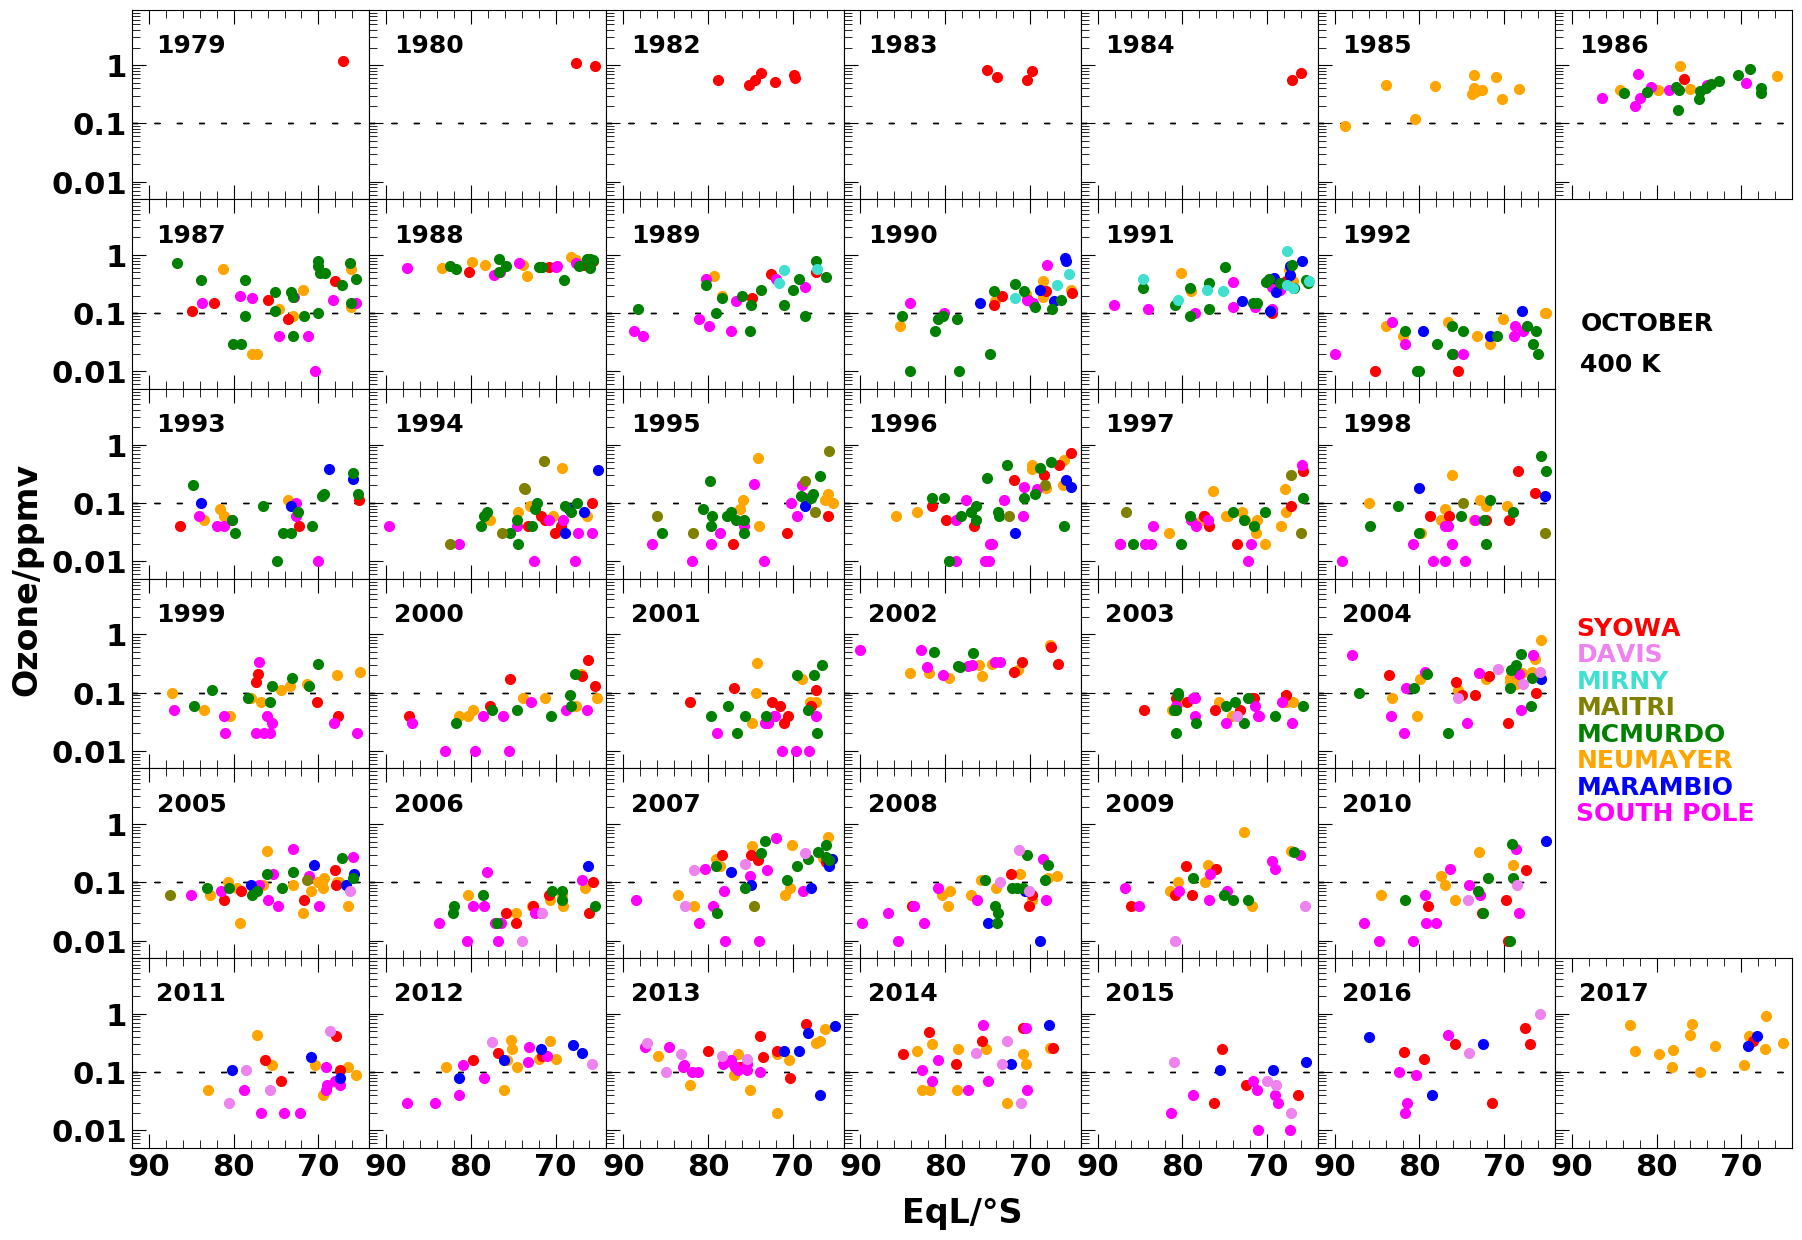

In [10]:
year=[1979, 1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 
      1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
      2015, 2016, 2017]
#year.reverse()
sl=[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,28,29,30,31,32,33,35,36,37,38,39,40,41]
fig, axes = facets(6, 7, width=18.0, aspect=0.8, internal_pad=0.0, top_pad=0.1, bottom_pad=0.9, left_pad=1.3, right_pad=0.1)
[axes[i].axis('off') for i in [13,20,27,34]]
pt=400
for stn,name,clr in zip(stations,names,clrs):
    #print(stn)
    df=dd.read_csv(merged+stn+'/*',sep='\s+')
    df=df[df['Con']<20][df['Mon']==mon_no][df['PoT']==pt][abs(df['eql'])>=65].compute()
    #print(df.head())
    for count, yr in zip(sl,year):
        dx=df[df['Year']==yr]
        dx=dx[['Year','Mon','Day','vmr','eql']]
        axes[count].axhline(0.1, color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
        axes[count].plot(dx['eql'], dx['vmr'], 'o', color=clr,label=name.upper(),markersize=7)
        axes[count].set_title(yr, x=0.25, y=0.73,fontsize=18,fontweight='bold')
        axes[count].set_yscale('log')
        plt.xticks([-90, -80, -70],[90,80,70])
axes[38].set_xlabel(u'EqL/\u00B0S',fontweight='bold',fontsize=24)
axes[21].set_ylabel('Ozone/ppmv',fontsize=24,va='center',position=(0, 1.0),fontweight='bold', labelpad=18)
axes[17].set_xlim([-92,-64])
axes[17].set_ylim([0.005,9])
axes[17].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
handles, labels=legend_texts_sort(axes[33])
leg=axes[33].legend(handles, labels, bbox_to_anchor=(0.7, 0.58),frameon=False,markerscale=0,prop=legend_properties)
color_legend_texts(leg)
for ax in axes:
    for l in ax.xaxis.get_ticklabels():
        l.set_weight("bold")
    for l in ax.yaxis.get_ticklabels():
        l.set_weight("bold")
axes[12].text(-61,0.05,mon_name.upper(),fontsize=18,fontweight='bold')
axes[12].text(-61,0.01,str(pt)+' K',fontsize=18,fontweight='bold')    
plt.minorticks_on() 
fig.savefig(eps+'sonde2'+'.eps')
fig.savefig(pdf+'sonde2'+'.pdf')
fig.savefig(png+'sonde2'+'.png')
plt.show(fig)

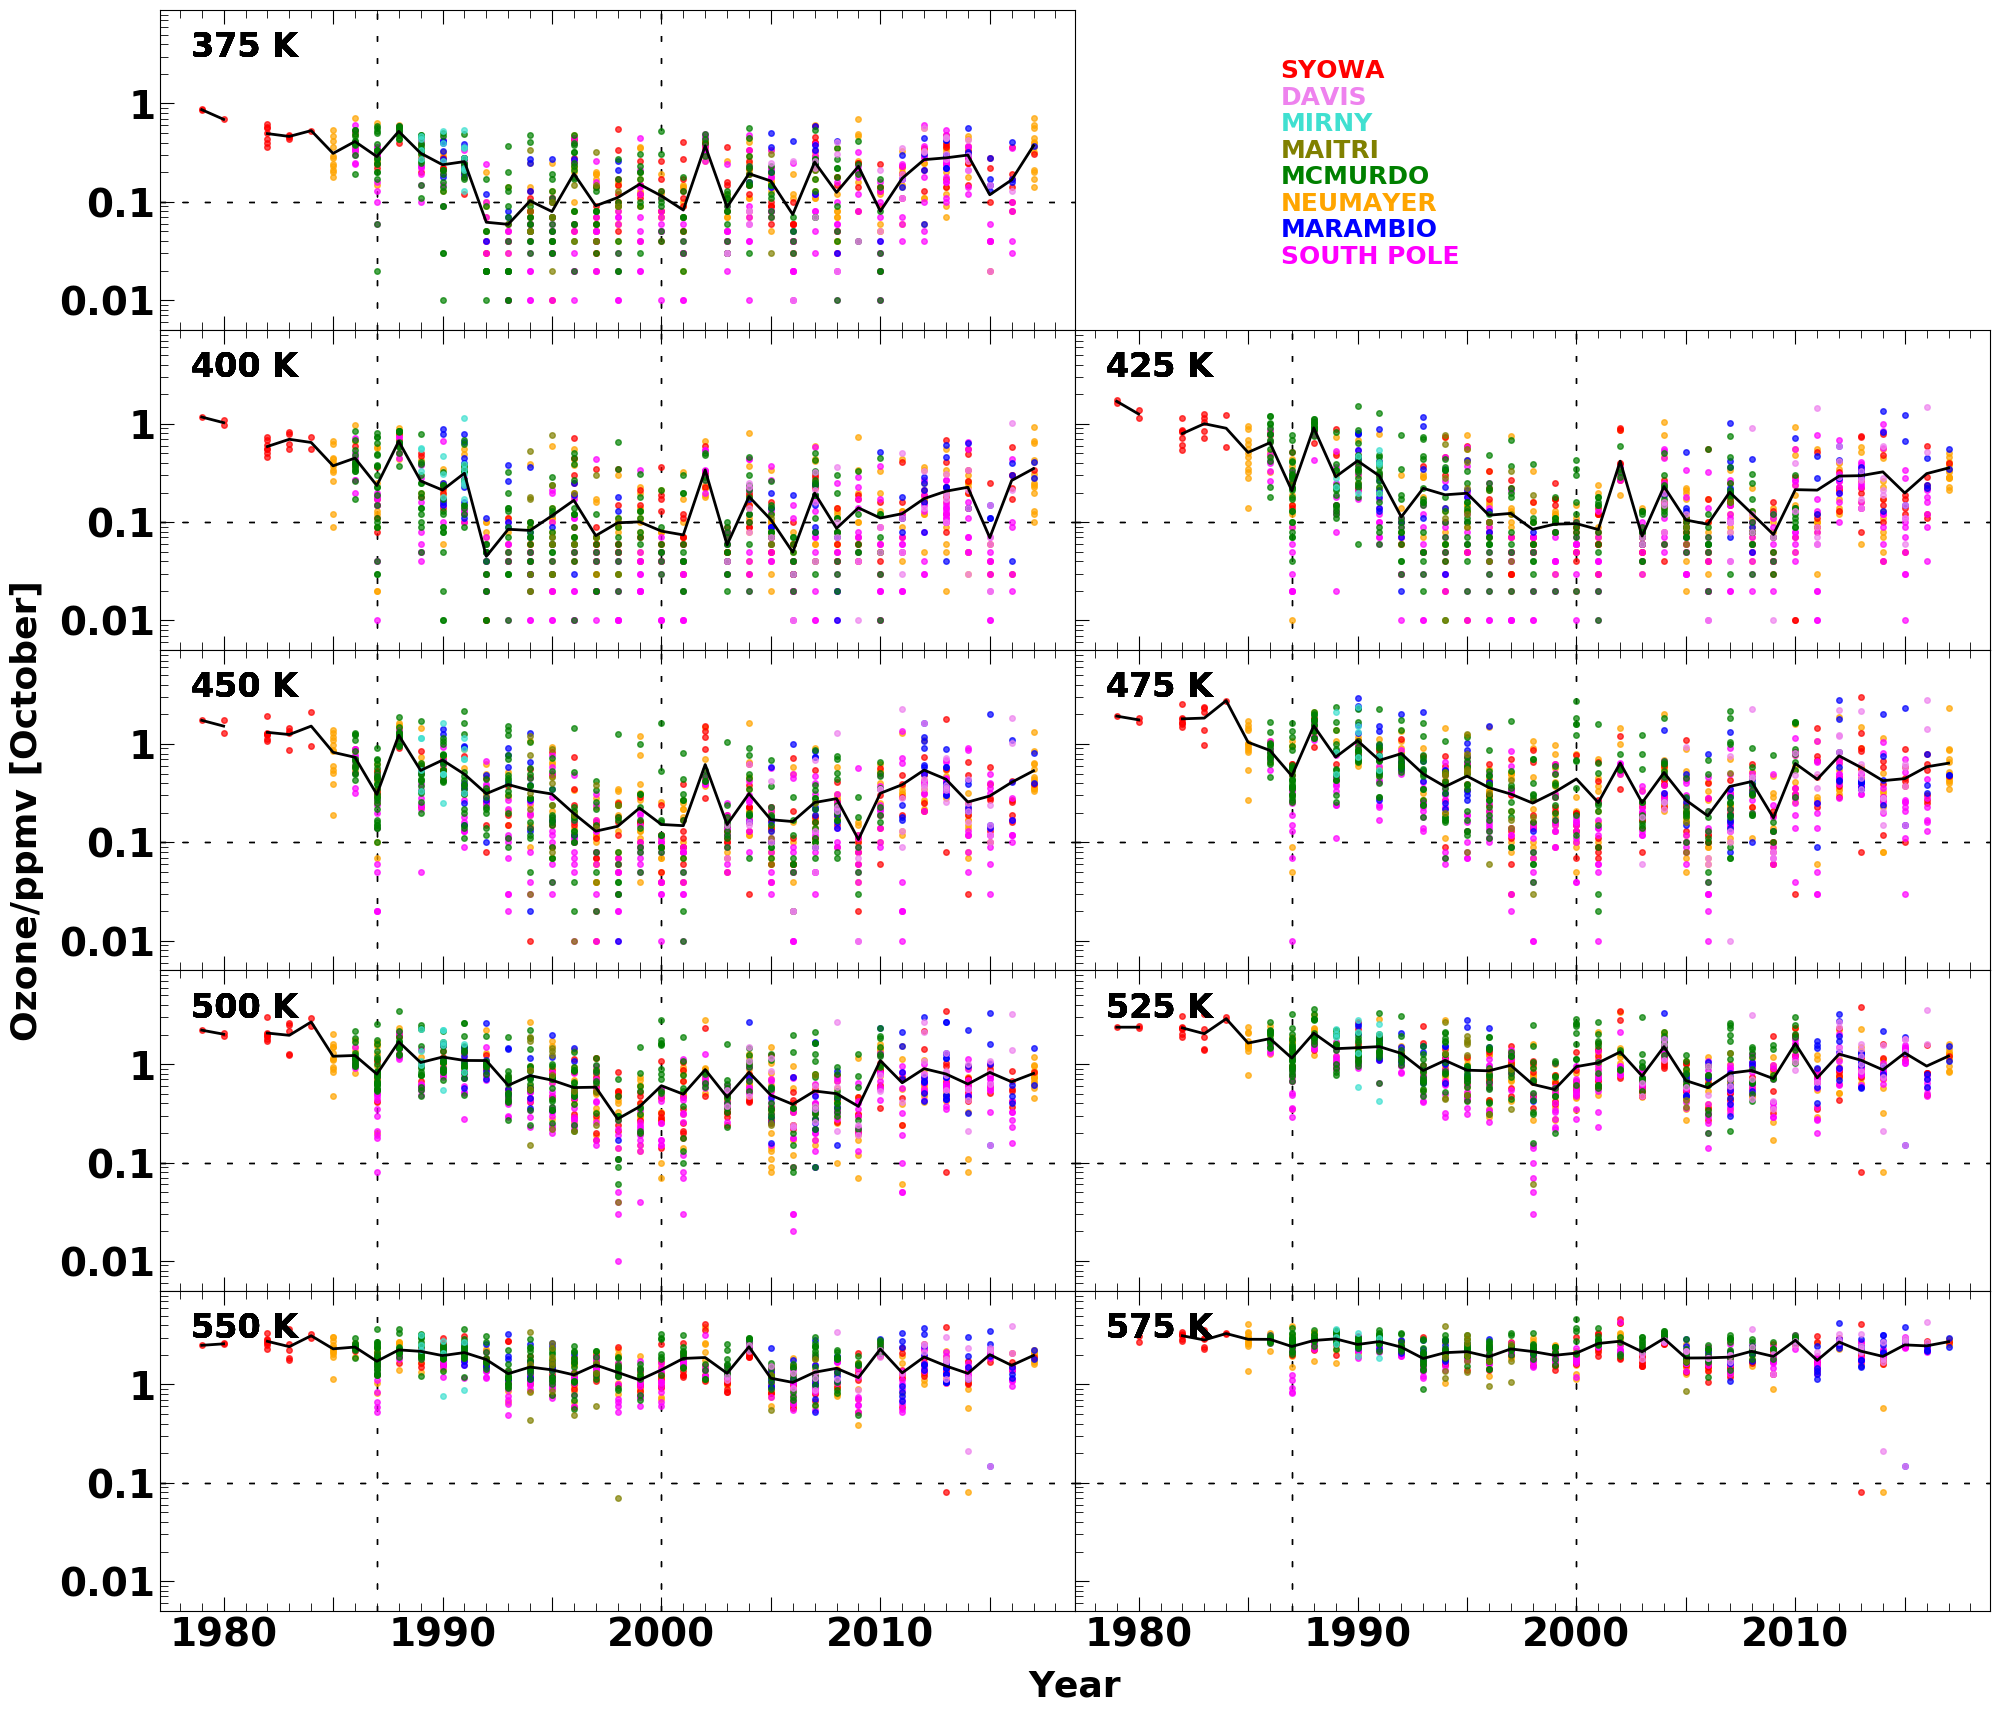

In [11]:
pot_lst=np.arange(375,576,25)
num=len(pot_lst)
#print num
fig, axes = facets(5, 2, width=20.0, aspect=0.35, internal_pad=0.0, top_pad=0.1, bottom_pad=1.0, left_pad=1.6, right_pad=0.1)
axes[1].axis('off')
axs=[]
for count,axis in enumerate(axes):
    if count==1:
        continue
    axs.append(axis)
for cnt,(pt,ax) in enumerate(zip(pot_lst,axs)):
    da=pd.DataFrame([])
    for i,(stn,name,clr) in enumerate(zip(stations,names,clrs)):
        df=dd.read_csv(merged+stn+'/*',sep='\s+')
        df=df[df['Con']<20][df['Mon']==mon_no][df['PoT']==pt][abs(df['eql'])>=65].compute()
        dy=df[['Year','Mon','Day','vmr','eql']] 
        da=pd.concat([da,dy],axis=0)
        ax.axhline(0.1,  color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
        ax.axvline(1987, color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
        ax.axvline(2000, color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
        ax.plot(dy['Year'],dy['vmr'],'o',color=clr,label=name.upper(),markersize=4,alpha=0.7)
        ax.set_yscale('log')   
        ax.text(1978.5,3,str(pt)+' K',fontsize=24,fontweight='bold')
    dm=da['vmr'].groupby(da['Year']).mean()
    #dm=np.log10(dm)
    dm[1981]=np.nan
    dm=dm.sort_index()
    #print dm.head()
    ax.plot(dm,label=' ', color='black')
    ax.set_yscale('log') 
    ax.set_ylim([0.005,9])
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
#leg=ax.legend(loc='lower left')
handles, labels=legend_texts_sort(axes[8])
leg=axes[0].legend(handles, labels, bbox_to_anchor=(1.2, 1.0),frameon=False,markerscale=0,handlelength=0, handletextpad=0,prop=legend_properties)
color_legend_texts(leg)
axes[8].set_xlabel('Year',position=(1,0),fontsize=26,fontweight='bold')
axes[4].set_ylabel('Ozone/ppmv ['+mon_name+']',fontsize=26,fontweight='bold')
plt.minorticks_on()
#axes[0].text(2020,0.1,mon_name.upper(),fontsize=18,fontweight='bold')
for ax in [axes[-1],axes[-2]]:
    x_ticks = ax.xaxis.get_major_ticks()
    [x_ticks[i].label.set_visible(False) for i in [2,4,6,8]]
for ax in axes:
    for l in ax.xaxis.get_ticklabels():
        l.set_weight("bold")
        l.set_fontsize(28)
    for l in ax.yaxis.get_ticklabels():
        l.set_weight("bold")
        l.set_fontsize(28)
fig.savefig(eps+'sonde3'+'.eps')
fig.savefig(pdf+'sonde3'+'.pdf')
fig.savefig(png+'sonde3'+'.png')
plt.show(fig)

In [12]:
#%run tco.ipynb

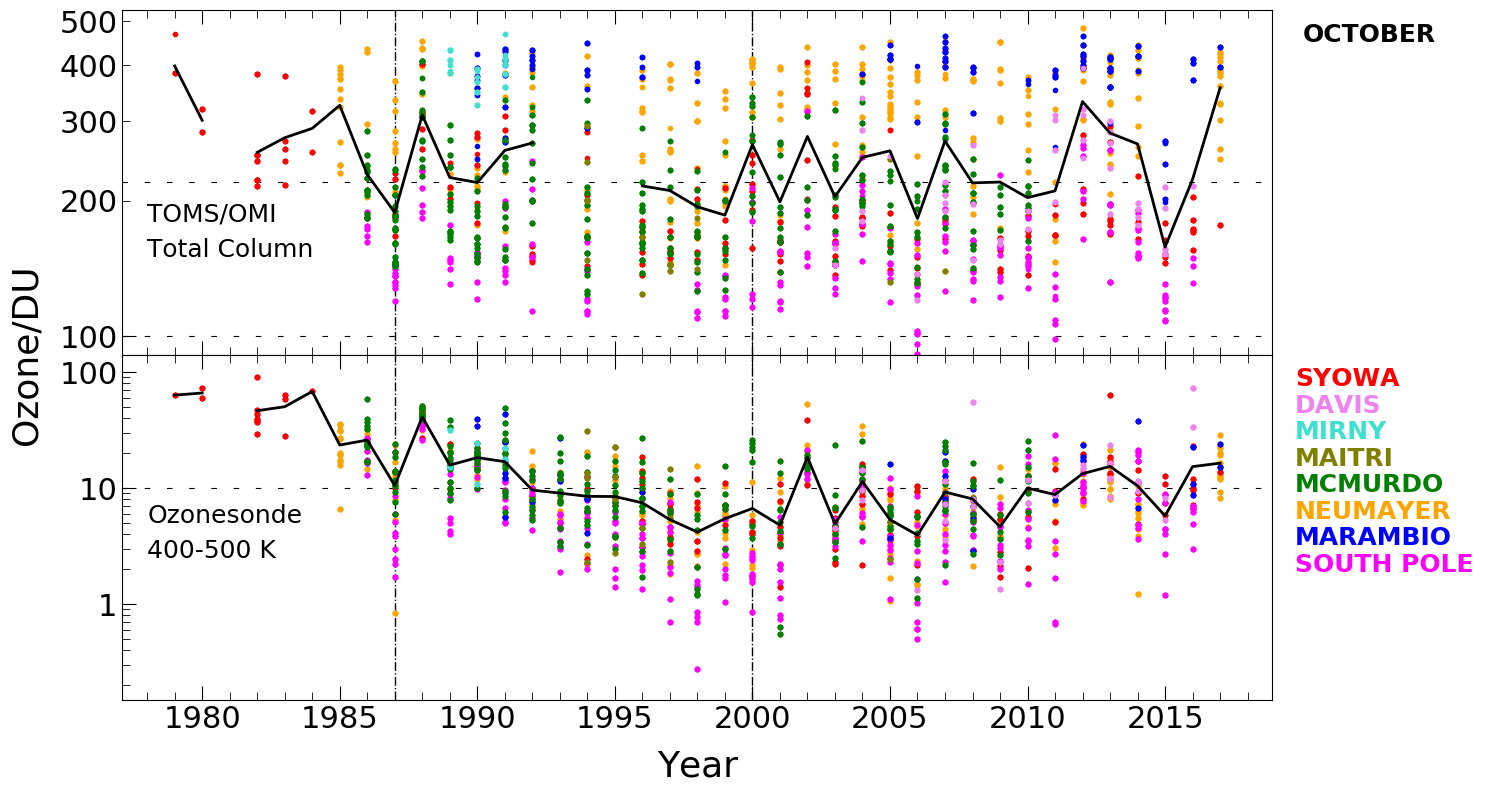

In [13]:
fig, axes = facets(2, 1, width=15.0, aspect=0.3, sharey='row', internal_pad=0.0, top_pad=0.1, bottom_pad=0.9, left_pad=1.3, right_pad=2.2)
omi=pd.read_csv(tco+'omi_toc.dat',sep='\t',index_col='Date')
dm=pd.DataFrame([])
for cnt,(stn,name,clr) in enumerate(zip(stations,names,clrs)):
    #print(stn)
    df=dd.read_csv(merged+stn+'/*',sep='\s+')
    df=df[df['Con']<20][df['Mon']==mon_no][df['PoT']>=400][df['PoT']<=500][abs(df['eql'])>=65].compute()
    df['Date']=pd.to_datetime(df['Year']*10000+df['Mon']*100+df['Day'],format='%Y%m%d')
    df=df[['Date','PoT','Alt','mPa','vmr','Con']].sort_values(by=['Date','PoT'], ascending=[True,True])
    df['Col']=np.nan
    date=df['Date'].unique()
    dy=pd.DataFrame([])
    for day in date:
        dx=df[df['Date']==day]
        try:
            dx['TCO']=omi.loc[str(day)[0:10],stn]
        except:
            dx['TCO']=np.nan
            
        if dx.shape[0]==5:
            ozo=dx['Con'].values
            alt=dx['Alt'].values
            i=np.arange(len(ozo)-1)
            dx['Col']=np.nansum(0.5*(ozo[i]+ozo[i+1])*(alt[i+1]-alt[i])/float(du))
            dy=pd.concat([dy,dx],axis=0)
        else:
            dy=pd.concat([dy,dx],axis=0)
    dy=dy[['Date','Col','TCO']]
    dm=pd.concat([dm,dy],axis=0)
    
    axes[0].plot(dy['Date'].dt.year,dy['TCO'],'o',color=clr,label=name.upper())
    axes[1].plot(dy['Date'].dt.year,dy['Col'],'o',color=clr,label=name.upper())
axes[1].axhline(10,  color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
axes[0].axhline(100, color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)
axes[0].axhline(220, color='black', linestyle=(0, (5, 15)), linewidth=0.8,zorder=1)

for ax in axes:
    ax.axvline(1987, color='black', linestyle='-.', linewidth=1,zorder=1)
    ax.axvline(2000, color='black', linestyle='-.', linewidth=1,zorder=1)
    ax.minorticks_on()
handles, labels=legend_texts_sort(axes[1])
leg=axes[1].legend(handles, labels, bbox_to_anchor=(1.0, 1.03),frameon=False,markerscale=0,handlelength=0,handletextpad=0,prop=legend_properties)
color_legend_texts(leg)

dm=dm.groupby(dm['Date'].dt.year).mean()
dm.loc[1981,'Col']=np.nan
dm=dm.sort_index()

axes[0].plot(dm['TCO'], color='black')
axes[0].set_yscale('log') 
axes[0].set_ylim([91,530])

axes[1].plot(dm['Col'], color='black')
axes[1].set_yscale('log') 
axes[1].set_ylim([0.15,140])
axes[1].set_ylabel('Ozone/DU',fontsize=26,position=(0,1))
axes[1].set_xlabel('Year',fontsize=26,position=(0.5,0))
axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axes[0].yaxis.set_minor_formatter(ticker.FormatStrFormatter("%d"))
axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
x=1978
fn=18
axes[0].text(2020,450,mon_name.upper(),fontsize=fn,fontweight='bold')
axes[0].text(x,180,'TOMS/OMI',fontsize=fn)
axes[0].text(x,150,'Total Column',fontsize=fn)
axes[1].text(x,5,'Ozonesonde',fontsize=fn)
axes[1].text(x,2.5,'400-500 K',fontsize=fn)


fig.savefig(eps+'sonde4'+'.eps')
fig.savefig(pdf+'sonde4'+'.pdf')
fig.savefig(png+'sonde4'+'.png')
plt.show(fig)

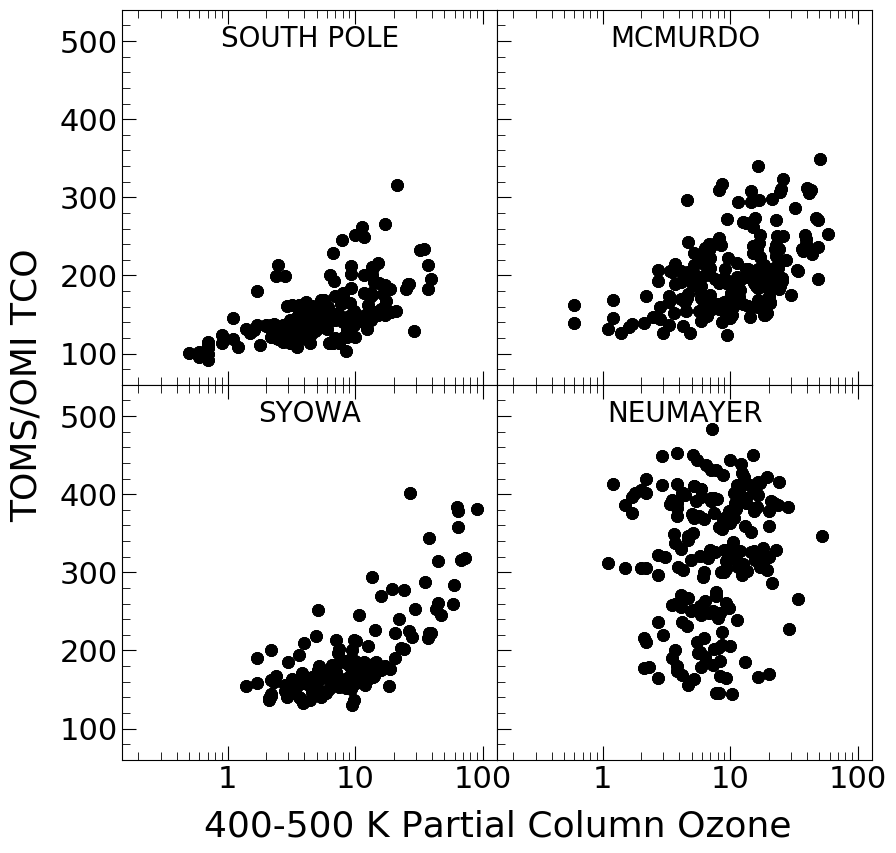

In [14]:
orde=[2,4,1,0]
station,name,cl=[[stations[i] for i in orde],[names[i] for i in orde], [clrs[i] for i in orde]]
#print station
fig, axes = facets(2, 2, width=9.0, aspect=1.0, internal_pad=0.0, top_pad=0.1, bottom_pad=1.1, left_pad=1.3, right_pad=0.2)
for cnt,(stn,name,clr,ax) in enumerate(zip(station,name,cl,axes)):
    #print(stn)
    dy=pd.read_csv(par+stn+'.csv',sep='\s+')
    ax.plot(dy['Col'],dy['TCO'],'o',color='black',label=name.upper(),markersize=8)
    ax.set_xscale('log') 
    ax.set_ylim([60,540])
    ax.set_xlim([0.15,130]) 
    ax.set_title(name.upper(),y=0.88,fontsize=20)
    ax.minorticks_on()
    for axis in [ax.xaxis,ax.yaxis]:
        axis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axes[2].set_xlabel('400-500 K Partial Column Ozone',position=(1.0,0),fontsize=26)
axes[2].set_ylabel('TOMS/OMI TCO',position=(0,1),fontsize=26)
fig.savefig(eps+'sonde5'+'.eps')
fig.savefig(pdf+'sonde5'+'.pdf')
fig.savefig(png+'sonde5'+'.png')
plt.show(fig)

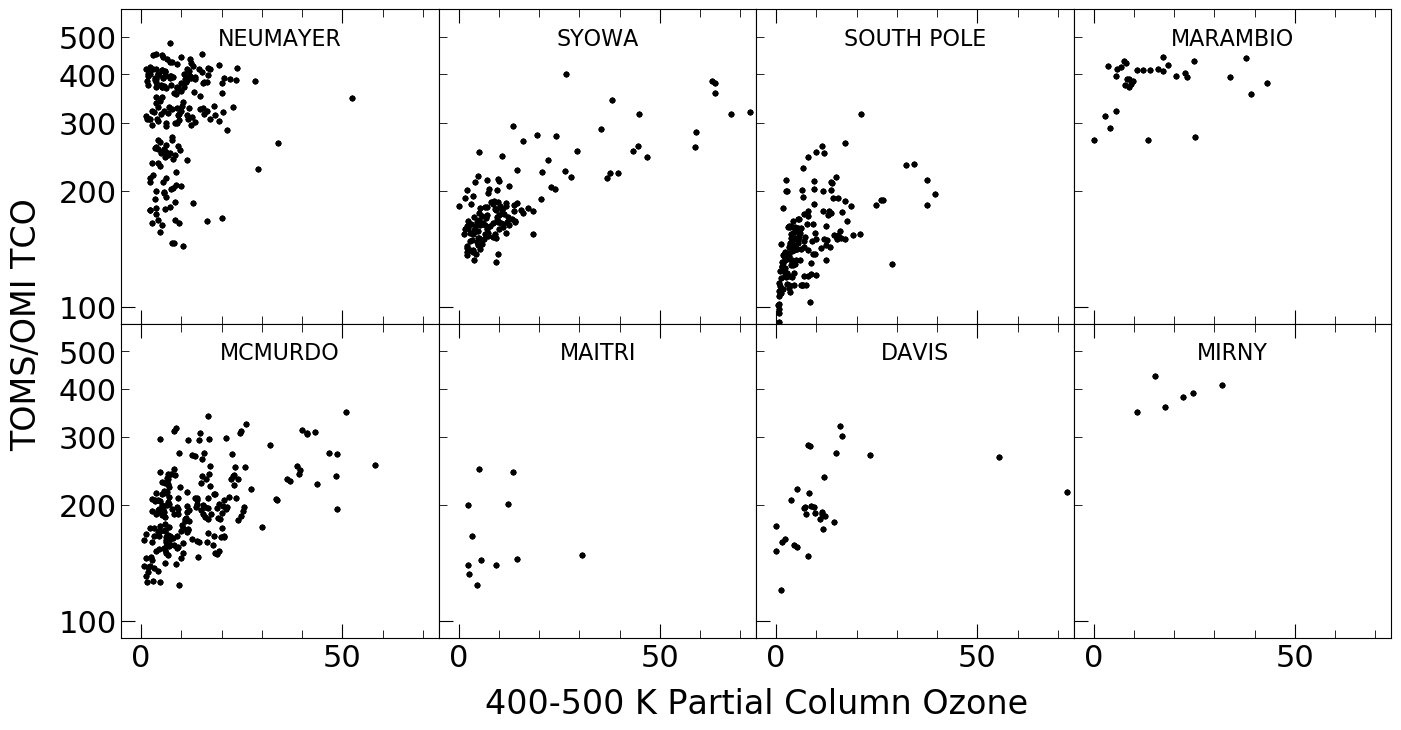

In [15]:
fig, axes = facets(2, 4, width=14.0, aspect=0.99, internal_pad=0.0, top_pad=0.1, bottom_pad=0.9, left_pad=1.2, right_pad=0.1)
for cnt,(stn,name,clr,ax) in enumerate(zip(stations,names,clrs,axes)):
    #print(stn)
    dy=pd.read_csv(par+stn+'.csv',sep='\s+')
    ax.plot(dy['Col'],dy['TCO'],'o',color='black',label=name.upper())
    ax.set_yscale('log')
    ax.set_title(name.upper(),y=0.86,fontsize=16)
    ax.set_xlim([-4.9,74]) 
    ax.set_ylim([90.5,590])        
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
    ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%d"))
    ax.minorticks_on()
axes[5].set_xlabel('400-500 K Partial Column Ozone',position=(1.0,0),fontsize=24)
axes[4].set_ylabel('TOMS/OMI TCO',position=(0,1),fontsize=24)
fig.savefig(eps+'sonde6'+'.eps')
fig.savefig(pdf+'sonde6'+'.pdf')
fig.savefig(png+'sonde6'+'.png')
plt.show(fig)

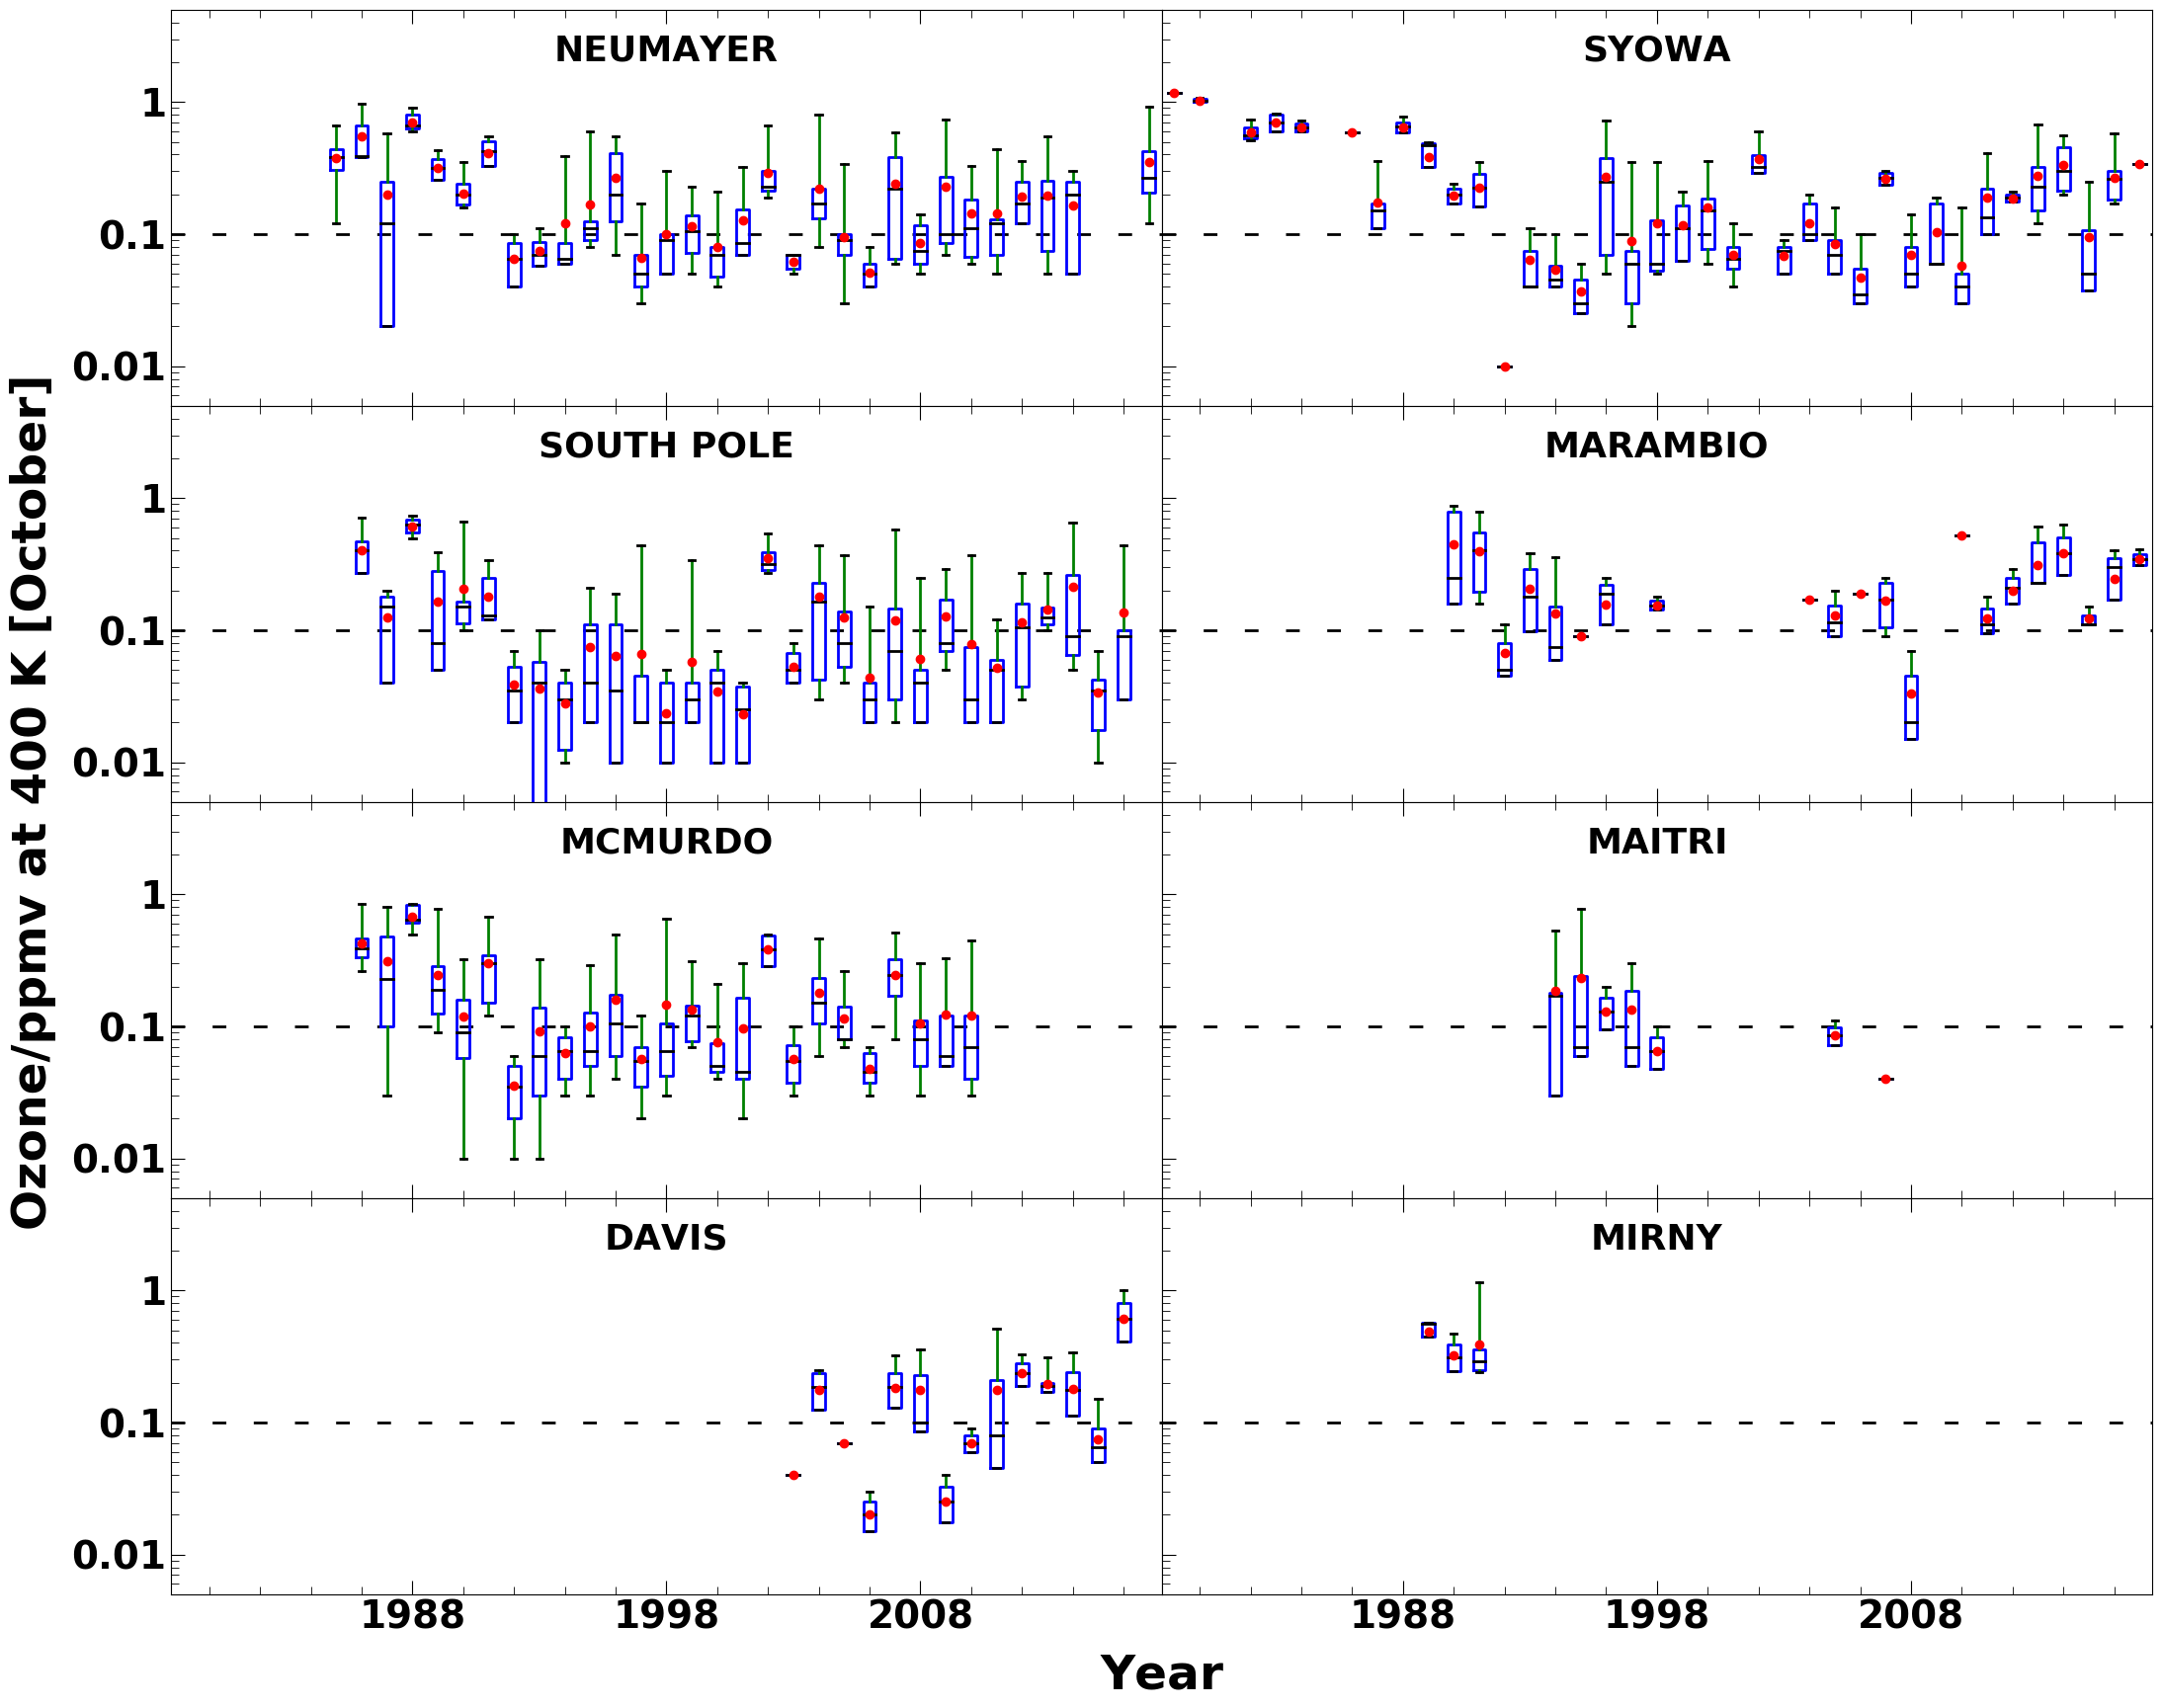

In [25]:
mpl.rcParams['boxplot.meanprops.marker']='o'
mpl.rcParams['boxplot.capprops.linewidth']=2
mpl.rcParams['boxplot.boxprops.linewidth']=12
mpl.rcParams['boxplot.medianprops.linewidth']=8
mpl.rcParams['boxplot.meanprops.markersize']=6
mpl.rcParams['boxplot.whiskerprops.linewidth']=12
# year=[ '',1980, '','','' ,'' , '','','','','', 1990, '','', '', '', '', '', '','', '', 2000, '', '', '', '', '', '', '', '', '', 2010, '', '', '', '',
#       '', '', '']
year=np.arange(1978,2018,10)
fig, axes = facets(4, 2, width=22.0, aspect=0.4, internal_pad=0, sharex='all', sharey='all', top_pad=0.1, bottom_pad=1.1, left_pad=1.75, right_pad=0.2)
boxprops = dict(linestyle='-', linewidth=2, color='blue')
medianprops = dict(linestyle='-', linewidth=2, color='k')
whiskerprops = dict(linestyle='-', linewidth=2, color='blue')
for i,(stn,name,clr) in enumerate(zip(stations,names,clrs)):
    ax=axes[i]
    df=dd.read_csv(merged+stn+'/*',sep='\s+')
    df=df[df['Con']<20][df['Mon']==mon_no][df['PoT']==400][abs(df['eql'])>=65]
    dy=df[['Year','vmr']].compute()
    temp=pd.DataFrame()
    temp['Year']=pd.Series(list(range(1979,2018)))
    temp['vmr']=np.nan
    dy=pd.concat([dy,temp],axis=0)
    ax.set_yscale('log') 
    bp=dy.boxplot(column='vmr', by='Year', ax=ax, return_type='dict',
               sym='b+',whis=[1,100],widths=0.5,manage_xticks=True, 
               showmeans=True, showfliers=False, showcaps=True, 
               medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops)    
    ax.axhline(0.1, color='black', linestyle=(0, (5, 10)), linewidth=2,zorder=1)
    [[item.set_color('b') for item in bp[key]['boxes']] for key in bp.keys()]
    [[item.set_color('k') for item in bp[key]['medians']] for key in bp.keys()]
    [[item.set_color('g') for item in bp[key]['whiskers']] for key in bp.keys()]
    [[item.set_markerfacecolor('r') for item in bp[key]['means']] for key in bp.keys()]
    [[item.set_markeredgecolor('r') for item in bp[key]['means']] for key in bp.keys()]
    ax.set_title(name.upper(),y=0.85, fontsize=26,fontweight='bold')
    ax.set_ylim([0.005,5])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_xticklabels(year, fontsize=28,fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=28,fontweight='bold')
    ax.grid(False)
    ax.minorticks_on()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
fig.suptitle('')
axes[6].set_xlabel('Year',position=(1.0,0),fontsize=35,fontweight='bold')
axes[7].set_xlabel('')
axes[4].set_ylabel('Ozone/ppmv at 400 K ['+mon_name+']',position=(0,1),fontsize=35,fontweight='bold')
count=[1,6,11,16,21,26,31,36]
ticks=ax.xaxis.get_ticklines()
ticks[0].set_markersize(3)
fig.savefig(eps+'sonde7'+'.eps')
fig.savefig(pdf+'sonde7'+'.pdf')
fig.savefig(png+'sonde7'+'.png')
plt.show(fig)

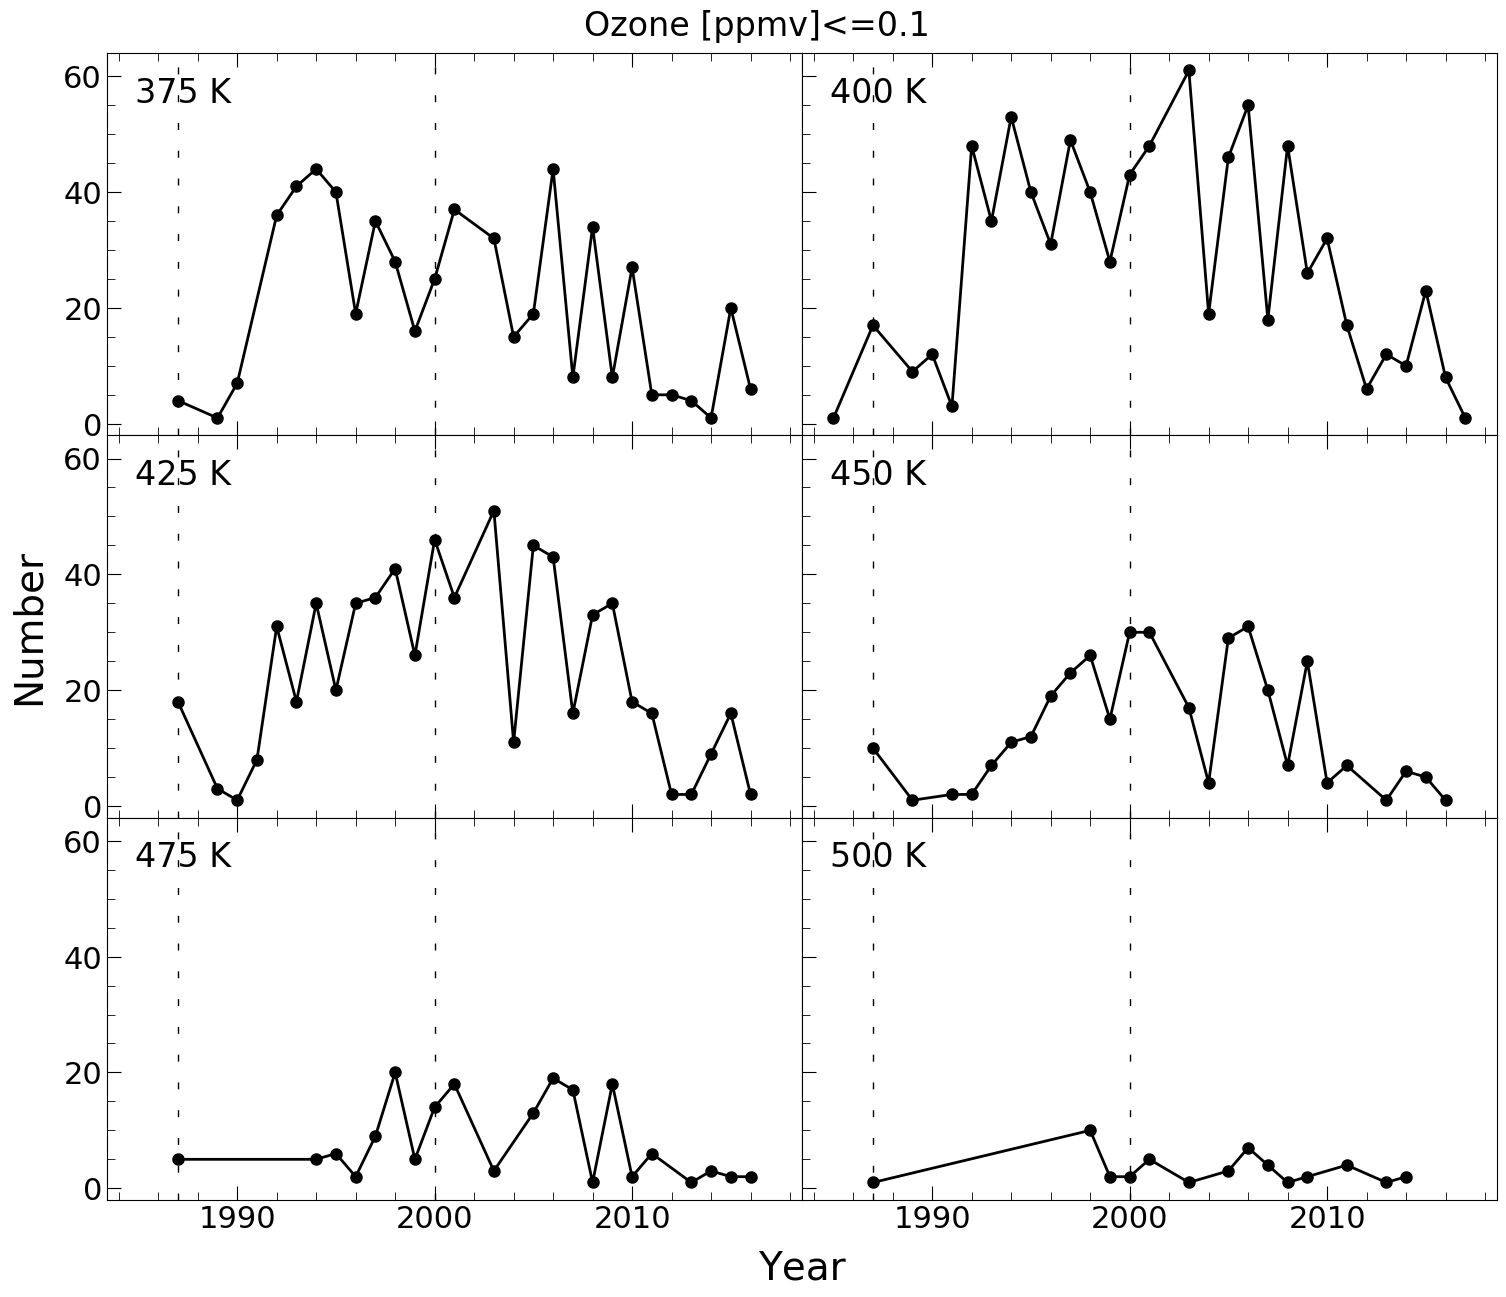

In [17]:
pot_lst=np.arange(375,501,25)
num=len(pot_lst)
fig, axes = facets(3, 2, width=15.0, aspect=0.55, internal_pad=0.0, top_pad=0.5, bottom_pad=0.9, left_pad=1.0, right_pad=0.1)
for cnt,(pt,ax) in enumerate(zip(pot_lst,axes)):
    da=pd.DataFrame([])
    for i,(stn,name,clr) in enumerate(zip(stations,names,clrs)):
        df=dd.read_csv(merged+stn+'/*',sep='\s+')
        df=df[df['Con']<20][df['vmr']<=0.1][df['Mon']>=9][df['Mon']<12][df['PoT']==pt][abs(df['eql'])>=65].compute()
        dy=df[['Year','Mon','Day','vmr','eql']] 
        dy['Date']=pd.to_datetime(dy['Year']*10000+dy['Mon']*100+dy['Day'],format='%Y%m%d')
        da=pd.concat([da,dy],axis=0,ignore_index=True)       
    dm=da['vmr'].groupby(da['Year']).count()
    dm[dm<=0]=np.nan
    ax.plot(dm,'o',markersize=8, color='black')
    ax.plot(dm, color='black')
    [ax.axvline(yr, color='black', linestyle=(0, (5, 15)), linewidth=1,zorder=1) for yr in [1987,2000]]
    ax.set_title(str(pt)+' K',y=.85,x=0.11)
axes[2].set_ylabel('Number',position=(0,0.5),fontsize=28)
[axes[i].set_xlabel(' ') for i in [3,5]]
axes[4].set_xlabel('Year',position=(1,0),fontsize=28)
plt.minorticks_on()
fig.suptitle('Ozone [ppmv]<=0.1',y=0.995)
fig.savefig(eps+'sonde8'+'.eps')
fig.savefig(pdf+'sonde8'+'.pdf')
fig.savefig(png+'sonde8'+'.png')
plt.show(fig)

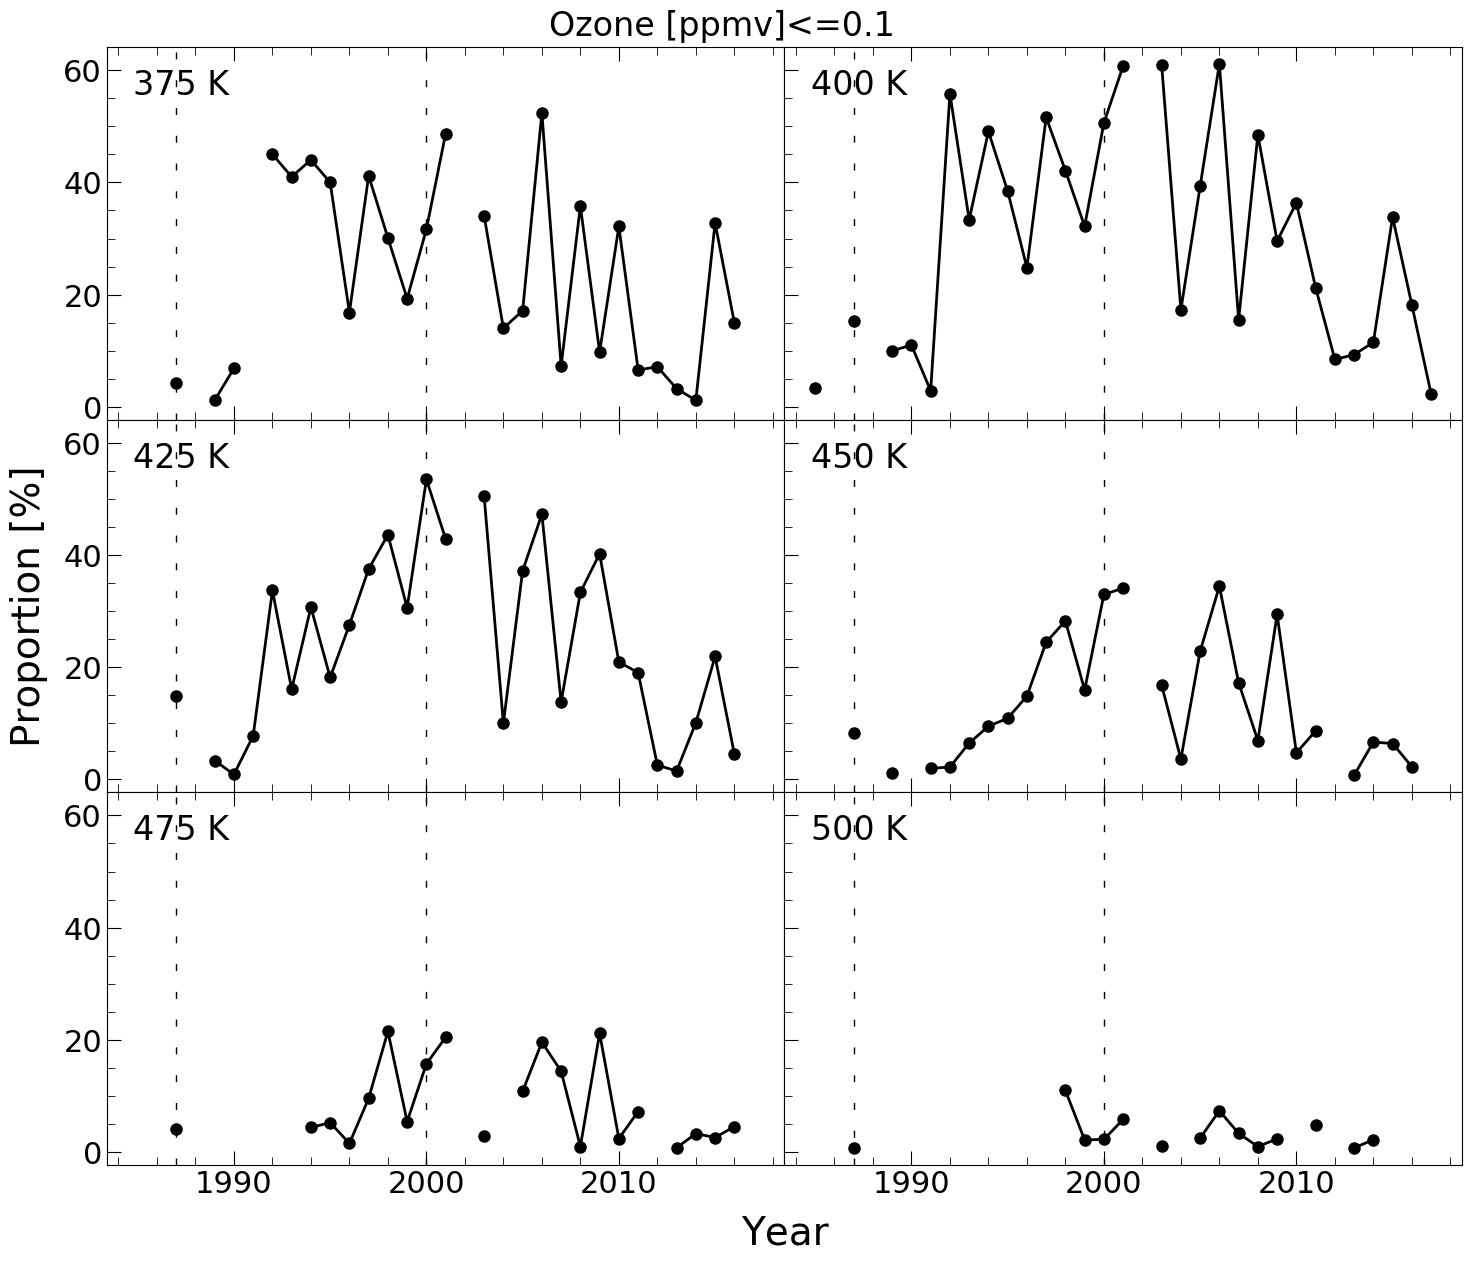

In [18]:
pot_lst=np.arange(375,501,25)
num=len(pot_lst)
fig, axes = facets(3, 2, width=15.0, aspect=0.55, internal_pad=0.0, top_pad=0.5, bottom_pad=0.9, left_pad=1.35, right_pad=0.1)
tot=pd.DataFrame([])
for cnt,(pt,ax) in enumerate(zip(pot_lst,axes)):
    da=pd.DataFrame([])
    for i,(stn,name,clr) in enumerate(zip(stations,names,clrs)):
        df=dd.read_csv(merged+stn+'/*',sep='\s+')
        df=df[df['Con']<20][df['Mon']>=9][df['Mon']<12][df['PoT']==pt][abs(df['eql'])>=65].compute()
        dy=df[['Year','Mon','Day','vmr','eql']] 
        dy['Date']=pd.to_datetime(dy['Year']*10000+dy['Mon']*100+dy['Day'],format='%Y%m%d')
        da=pd.concat([da,dy],axis=0,ignore_index=True)       
    dm1=da['vmr'].groupby(da['Year']).count()
    dm2=da[da['vmr']<=0.1]['vmr'].groupby(da['Year']).count()
    dm=100*dm2/dm1
    dm[dm<=0]=np.nan
    tot=pd.concat([tot,dm],axis=1)
    #print dm
    ax.plot(dm,'o',markersize=8, color='black')
    ax.plot(dm, color='black')
    [ax.axvline(yr, color='black', linestyle=(0, (5, 15)), linewidth=1,zorder=1) for yr in [1987,2000]]
    ax.set_title(str(pt)+' K',y=.85,x=0.11)
axes[4].set_xlabel('Year',position=(1,0),fontsize=28)
[axes[i].set_xlabel(' ') for i in [3,5]]
axes[2].set_ylabel('Proportion [%]',position=(0,0.5),fontsize=28)
fig.suptitle('Ozone [ppmv]<=0.1',y=0.99)
plt.minorticks_on()
fig.savefig(eps+'sonde9'+'.eps')
fig.savefig(pdf+'sonde9'+'.pdf')
fig.savefig(png+'sonde9'+'.png')
plt.show(fig)

In [19]:
tot.columns=pot_lst
#print tot
tot.to_csv('/home/pankaj/phd/saturation/all.txt',sep='\t',float_format='%6.2f',na_rep='NaN')

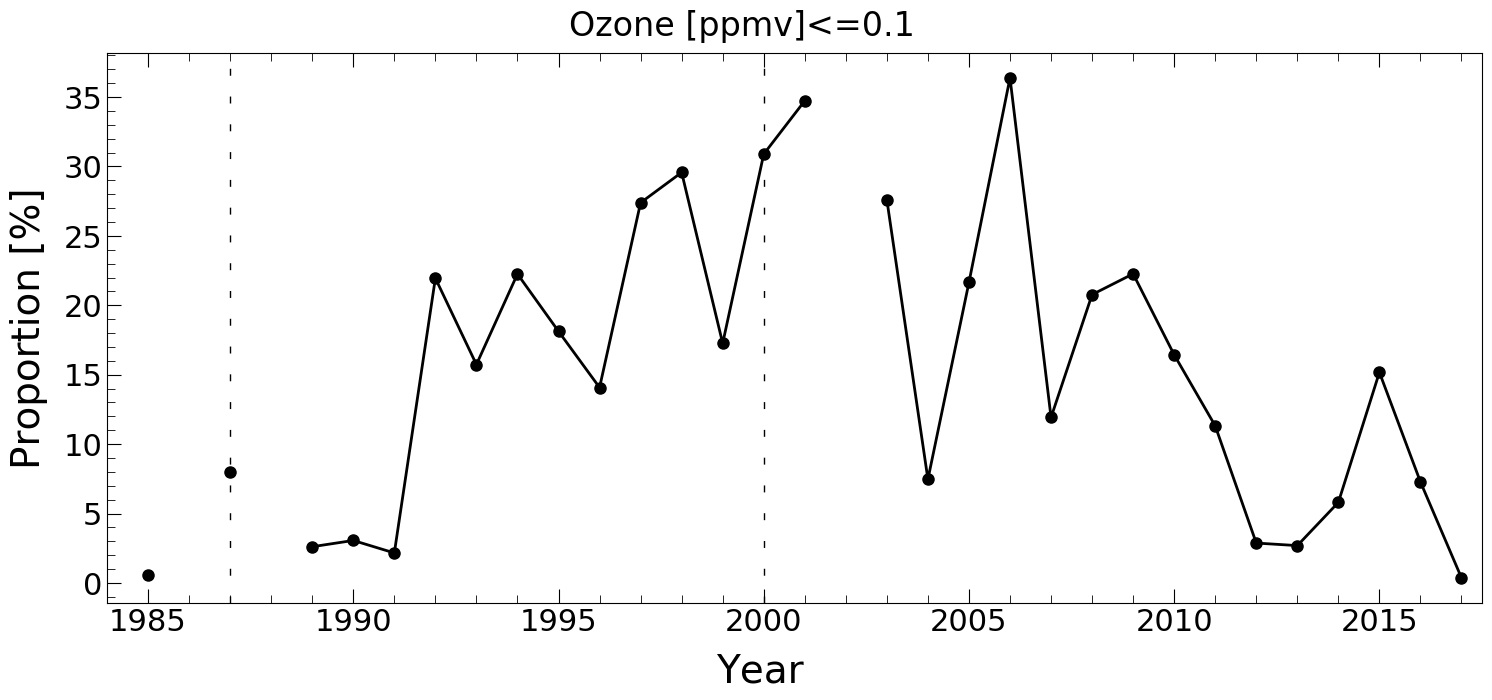

In [20]:
pot_lst=np.arange(375,501,25)
num=len(pot_lst)
fig, ax = facets(1, 1, width=15.0, aspect=0.4, internal_pad=0.0, top_pad=0.5, bottom_pad=0.9, left_pad=1.15, right_pad=0.1)
db=pd.DataFrame([])
ax=ax[0]
for cnt, pt in enumerate(pot_lst):
    da=pd.DataFrame([])
    for i,(stn,name,clr) in enumerate(zip(stations,names,clrs)):
        df=dd.read_csv(merged+stn+'/*',sep='\s+')
        df=df[df['Mon']>=9][df['Mon']<12][df['PoT']==pt][abs(df['eql'])>=65].compute()
        df=df[['Year','Mon','Day','vmr','eql']] 
        da=pd.concat([da,df],axis=0,ignore_index=True)   
    db=pd.concat([db,da],axis=0,ignore_index=True) 
dm1=db['vmr'].groupby(db['Year']).count()
dm2=db[db['vmr']<=0.1]['vmr'].groupby(db['Year']).count()
dm=100*dm2/dm1
dm[dm<=0]=np.nan
ax.plot(dm,'o',markersize=8, color='black')
ax.plot(dm, color='black')
[ax.axvline(yr, color='black', linestyle=(0, (5, 15)), linewidth=1,zorder=1) for yr in [1987,2000]]
ax.set_xlabel('Year',fontsize=28,position=(0.475,0))
ax.set_ylabel('Proportion [%]',fontsize=28)
fig.suptitle('Ozone [ppmv]<=0.1',y=0.99)
ax.set_xlim([1984,2017.5])
#ax.set_ylim([0.1,55])
plt.minorticks_on()
fig.savefig(eps+'sonde10'+'.eps')
fig.savefig(pdf+'sonde10'+'.pdf')
fig.savefig(png+'sonde10'+'.png')
plt.show(fig)

In [21]:
son=pd.read_csv('/home/pankaj/phd/saturation/both.txt',sep='\s+')
son.index=son['Year']
sonde=son['Sonde']
mls=son['Satellite'][son.index>=2004]
sage=son['Satellite'][son.index<2004]
#print sage

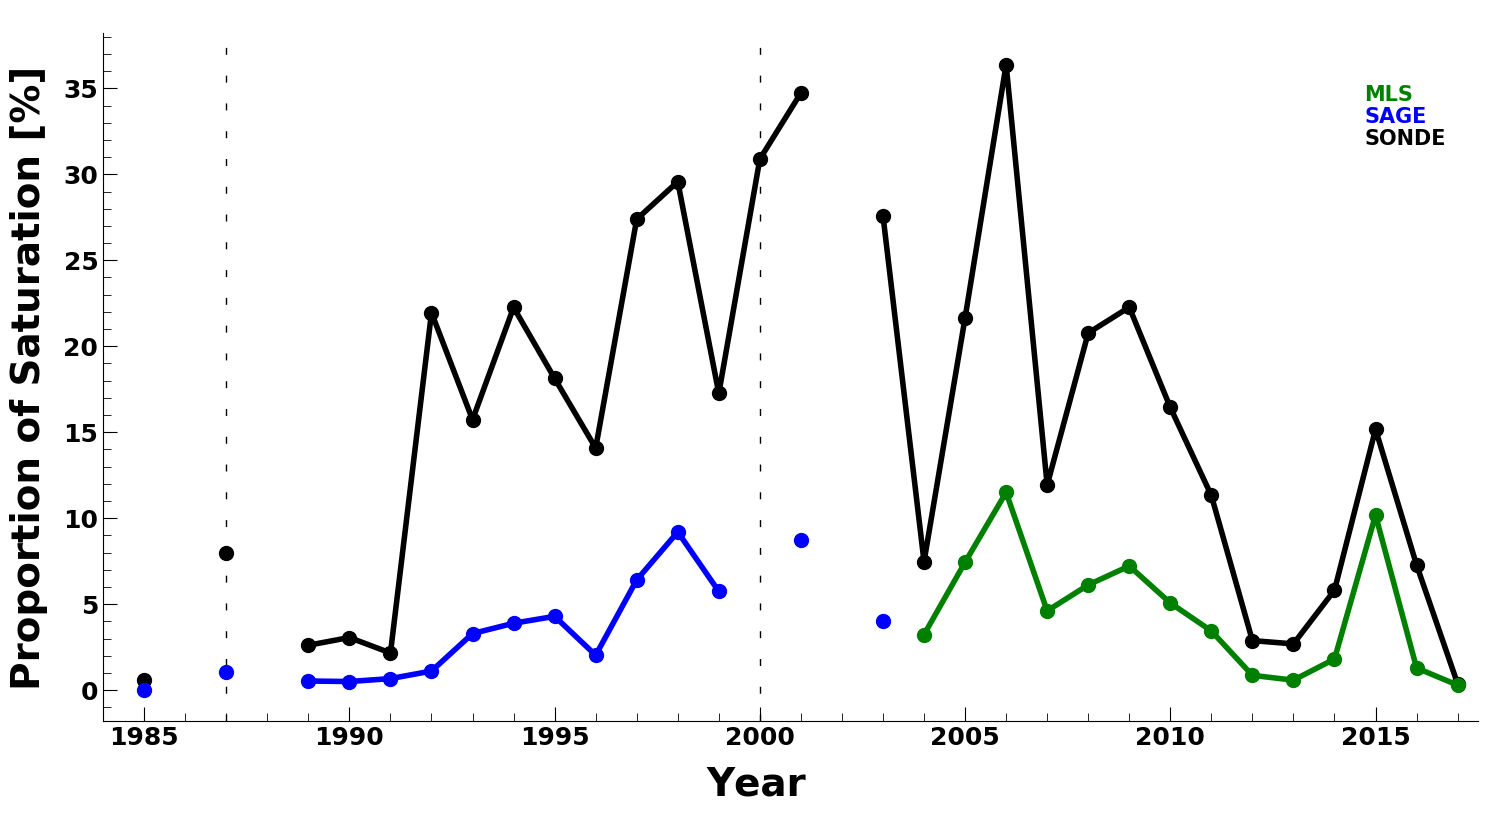

In [22]:
# saturation proportion plot for both sonde and satelites (mls and sage)
mpl.rcParams['legend.fontsize'] = 15
pot_lst=np.arange(375,501,25)
num=len(pot_lst)
fig, ax = facets(1, 1, width=15.0, aspect=0.5, internal_pad=0.0, top_pad=0.5, bottom_pad=0.9, left_pad=1.15, right_pad=0.1)
ax=ax[0]
lw=4
msize=10
ax.plot(sonde,'o',markersize=msize, color='black',label=' ')
ax.plot(sonde, color='black',label='SONDE',lw=lw)
ax.plot(sage,'o',markersize=msize, color='blue',label=' ')
ax.plot(sage, color='blue',label='SAGE',lw=lw)
ax.plot(mls,'o',markersize=msize, color='green',label=' ')
ax.plot(mls, color='green',label='MLS',lw=lw)
[ax.axvline(yr, color='black', linestyle=(0, (5, 15)), linewidth=1,zorder=1) for yr in [1987,2000]]
ax.set_xlabel('Year',fontsize=28,position=(0.475,0),fontweight='bold')
ax.set_ylabel('Proportion of Saturation [%]',fontsize=28,fontweight='bold')
# fig.suptitle('Ozone [ppmv]<=0.1',y=0.977)
ax.set_xlim([1984,2017.5])
plt.minorticks_on()
handles, labels=legend_texts_sort(ax)
leg=ax.legend(handles, labels, bbox_to_anchor=(0.99, 1.05),frameon=False,markerscale=0,handlelength=0,handletextpad=0,prop=legend_properties)
color_legend_texts(leg)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

for l in ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels():
        l.set_weight("bold")
        l.set_fontsize(18)

fig.savefig(eps+'sonde11'+'.eps')
fig.savefig(pdf+'sonde11'+'.pdf')
fig.savefig(png+'sonde11'+'.png')
plt.show(fig)